In [15]:
#!pip install tensorflow

In [16]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.datasets import cifar10

In [20]:
cifar10=tf.keras.datasets.cifar10

In [21]:
(train_images, train_labels), (test_images, test_labels)=cifar10.load_data()

In [22]:
#from tensorflow.keras.datasets import cifar10

#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [23]:
train_images.shape 

(50000, 32, 32, 3)

In [24]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [25]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

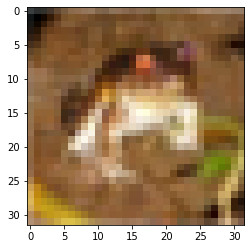

In [26]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')   

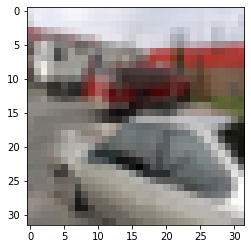

In [27]:
plt.imshow(train_images[49999], cmap='gray')

In [28]:
test_images.shape

(10000, 32, 32, 3)

In [29]:
train_images.shape

(50000, 32, 32, 3)

In [32]:
cifar10=tf.keras.datasets.cifar10
(train_images,train_labels), (test_images,test_labels)=cifar10.load_data()

train_images=train_images.reshape(50000, 32, 32, 3)
test_images=test_images.reshape(10000, 32, 32, 3)
train_images, test_images=train_images/255.0, test_images/255.0

model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
                           tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Dropout(0.25),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(100, activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, batch_size=32, epochs=15, verbose=1, validation_data=(test_images,test_labels))

C:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 549s 337ms/step - loss: 1.7896 - accuracy: 0.3402 - val_loss: 1.4762 - val_accuracy: 0.4727
Epoch 2/15
1563/1563 [==============================] - 442s 283ms/step - loss: 1.4602 - accuracy: 0.4749 - val_loss: 1.2971 - val_accuracy: 0.5413
Epoch 3/15
1563/1563 [==============================] - 438s 280ms/step - loss: 1.3271 - accuracy: 0.5282 - val_loss: 1.1689 - val_accuracy: 0.5919
Epoch 4/15
1563/1563 [==============================] - 435s 278ms/step - loss: 1.2313 - accuracy: 0.5637 - val_loss: 1.0716 - val_accuracy: 0.6179
Epoch 5/15
1563/1563 [==============================] - 443s 283ms/step - loss: 1.1640 - accuracy: 0.5870 - val_loss: 1.0560 - val_accuracy: 0.6299
Epoch 6/15
1563/1563 [==============================] - 446s 285ms/step - loss: 1.1203 - accuracy: 0.6002 - val_loss: 1.0173 - val_accuracy: 0.6417
Epoch 7/15
1563/1563 [==============================] - 446s 285ms/step - loss: 1.0723 - accuracy: 0.6169 - val_

In [33]:
# Epoch sayısını arttırdıkça başarı oranım artıyor.